<a href="https://colab.research.google.com/github/TheJojoJoseph/Assignment2_CSL7390_Jojo_g23ai2100/blob/main/Assignment2_CSL7390_Jojo_g23ai2100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Girvan-Newman Algorithm

The Girvan-Newman algorithm for the detection and analysis of community structure relies on the iterative elimination of edges that have the highest number of shortest paths between nodes passing through them. By removing edges from the graph one-by-one, the network breaks down into smaller pieces, so-called communities. The algorithm was introduced by Michelle Girvan and Mark Newman.

## How does it work ?

The idea was to find which edges in a network occur most frequently between other pairs of nodes by finding edges betweenness centrality. The edges joining communities are then expected to have a high edge betweenness. The underlying community structure of the network will be much more fine-grained once the edges with the highest betweenness are eliminated which means that communities will be much easier to spot.

## Algorithm

The Girvan-Newman algorithm can be divided into four main steps:

1. For every edge in a graph, calculate the edge betweenness centrality.
2. Remove the edge with the highest betweenness centrality.
3. Calculate the betweenness centrality for every remaining edge.
4. Repeat steps 2-4 until there are no more edges left.

## Consider the following Example:

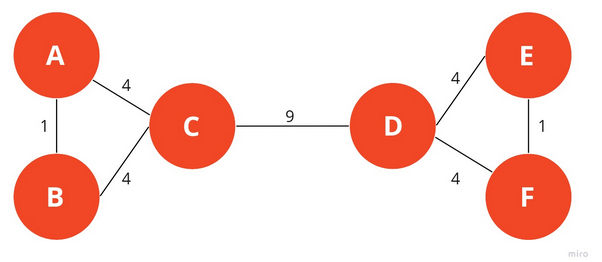

In this example, you can see how a typical graph looks like when edges are assigned weights based on the number of shortest paths passing through them. To keep things simple, we only calculated the number of undirected shortest paths that pass through an edge. The edge between nodes A and B has a strength of 1 because we don’t count A->B and B->A as two different paths.

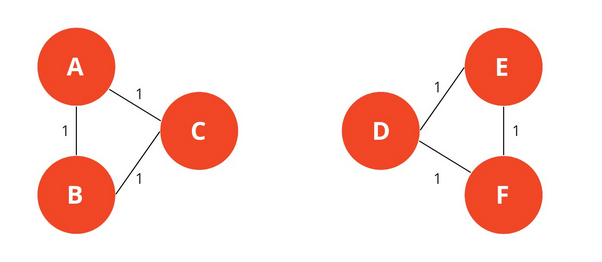

The Girvan-Newman algorithm would remove the edge between nodes C and D because it is the one with the highest strength. As you can see intuitively, this means that the edge is located between communities. After removing an edge, the betweenness centrality has to be recalculated for every remaining edge. In this example, we have come to the point where every edge has the same betweenness centrality.

## Betweeness Centrality

Betweenness centrality measures the extent to which a vertex or edge lies on paths between vertices. Vertices and edges with high betweenness may have considerable influence within a network by virtue of their control over information passing between others.

The calculation of betweenness centrality is not standardized and there are many ways to solve it. It is defined as the number of shortest paths in the graph that pass through the node or edge divided by the total number of shortest paths.

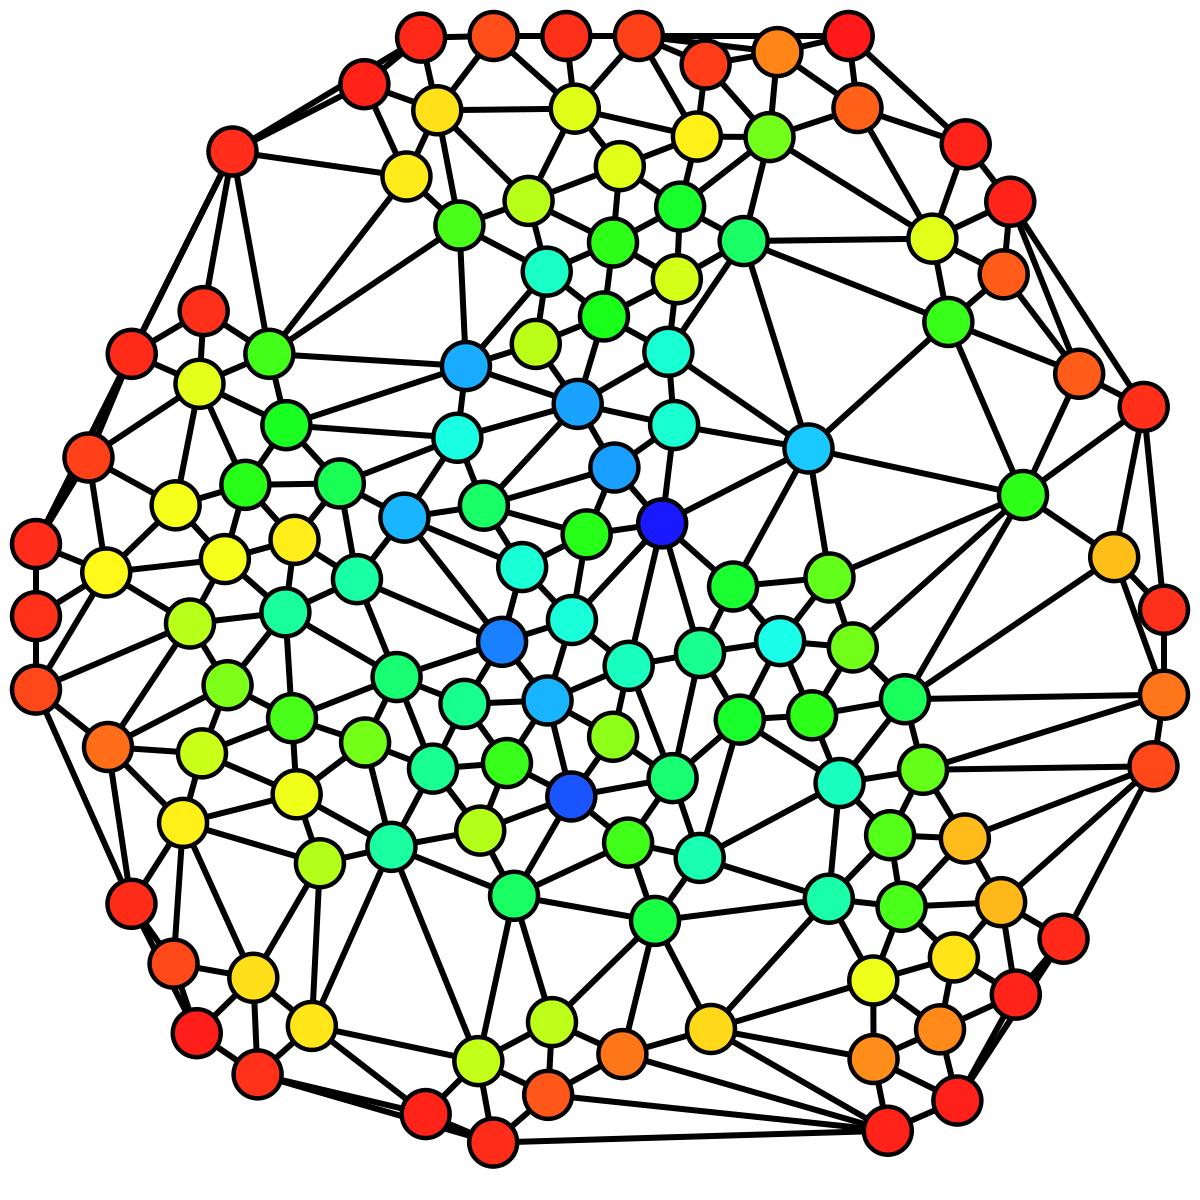

The image above shows an undirected graph colored based on the betweenness centrality of each vertex from least (red) to greatest (blue).

# Task 1 (20 marks)

## Write a function to retrun a random walk from every node of a graph (you can consider the karate club graph for example).

Definition of a random walk:

**Given a graph and a node 'i', we select a neighbor 'j' of 'i' at random and move to this selected neighbor 'j'. Then we move to the neighbor of 'j' and so on.**

More details can be found in this tutorial: https://www.youtube.com/watch?v=Xv0wRy66Big

Write a function that takes a graph 'G' a node 'i' and walk_length=3 and returns a random walk for that node. The random walk is a list of nodes that the walker traversed starting from 'i'.

For example consider the graph G in the following figure with random walk length 3:

Random walk for (i = 0) = [0,1,0], with edges [(0,1), (1,0)]

Random walk for (i = 1) = [1,0,2], with edges [(1,0), (0,2)]

Random walk for (i = 2) = [2,0,2], with edges [(2,0), (0,2)]

**Your function should return [0,1,0] when called as random_walk(G, 0, walk_length=3)**

Note: This is just an example, since the process is random so "random_walk(G, i = 0, walk_length=3)" can return [0,2,0] as well.


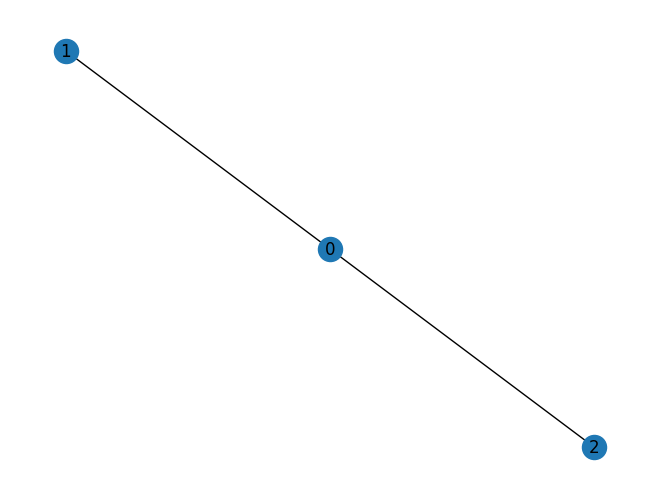

In [3]:
#Ans 1

import networkx as nx
import random

def random_walk(G, i, walk_length):
    walk = [i]
    current_node = i
    for i in range(walk_length - 1):
        neighbors = list(G.neighbors(current_node))
        if len(neighbors) == 0:
            break #break whem no neignbours
        next_node = random.choice(neighbors)
        walk.append(next_node)
        current_node = next_node
    return walk





G = nx.karate_club_graph() #<--- Example Karate Club graph
print(random_walk(G, 0, walk_length=3))



[0, 21, 0]


# Task 2 (20 Marks)

## Now aggreagate the edges that appear in the random walk for each node (use the function random_walk) and count the occurence of each edge. This function will take a graph as input and return a dictionary with the count of edge occurence (divided by the total number of edges including repeated edges) for every edge in the random walk of the graph.

For example consider the previous graphs and the previous walks:

All the edges combined can be listed as
[(0,1), (1,0), (1,0), (0,2), (2,0), (0,2)]

Since we are considering an undirected graph so we will consider (0,1) and (1,0) as the same edge. So the occurence of each edge will be:

(0,1):3

(0,2):3

**The total numbe of edges were 6 so your function should return the dictionary:**

**{(0,1):0.5, (0,2):0.5}**

In [22]:
#Ans 2
from collections import defaultdict


# def rw_edge_betweeness(G, walk_length=3, num_walks=10):
#     edge_betweeness_dict = defaultdict(int)
#     total_edges = 0
#     for node in G.nodes():
#         for i in range(num_walks):
#             walk = random_walk(G, node, walk_length)
#             alledges = len(walk) - 1
#             for i in range(alledges):
#                 edge = tuple(sorted((walk[i], walk[i+1])))
#                 edge_betweeness_dict[edge] += 1
#                 total_edges += 1
#     for edge in edge_betweeness_dict:
#         edge_betweeness_dict[edge] /= total_edges
#     return dict(edge_betweeness_dict) #<-

# #test
# G = nx.karate_club_graph()
# edge_betweeness_dict = rw_edge_betweeness(G, walk_length=3, num_walks=10)
# print(edge_betweeness_dict)

# Modified rw_edge_betweenness for custom graph format (adjacency list)
def rw_edge_betweeness(G, walk_length=3, num_walks=10):
    edge_betweenness = defaultdict(int)
    total_edges = 0

    # Perform random walks starting from every node in the graph
    for node in G:
        for _ in range(num_walks):
            walk = random_walk(G, node, walk_length)

            # Aggregate edges from the walk
            for i in range(len(walk) - 1):
                edge = tuple(sorted((walk[i], walk[i+1])))  # Sort the edge to consider it undirected
                edge_betweenness[edge] += 1
                total_edges += 1

    # Normalize the edge betweenness by the total number of edges
    for edge in edge_betweenness:
        edge_betweenness[edge] /= total_edges

    return edge_betweenness

{(0, 1): 0.013235294117647059, (1, 3): 0.01764705882352941, (0, 5): 0.011764705882352941, (5, 6): 0.033823529411764704, (0, 13): 0.010294117647058823, (3, 13): 0.010294117647058823, (0, 19): 0.0058823529411764705, (1, 19): 0.016176470588235296, (1, 13): 0.01911764705882353, (5, 10): 0.008823529411764706, (0, 4): 0.01911764705882353, (4, 10): 0.01764705882352941, (0, 21): 0.016176470588235296, (0, 8): 0.011764705882352941, (1, 17): 0.014705882352941176, (0, 17): 0.016176470588235296, (1, 7): 0.008823529411764706, (3, 7): 0.01764705882352941, (13, 33): 0.01764705882352941, (1, 30): 0.0058823529411764705, (8, 30): 0.011764705882352941, (2, 7): 0.013235294117647059, (19, 33): 0.011764705882352941, (1, 2): 0.008823529411764706, (0, 7): 0.013235294117647059, (2, 28): 0.013235294117647059, (28, 31): 0.014705882352941176, (2, 13): 0.007352941176470588, (0, 2): 0.0058823529411764705, (2, 32): 0.007352941176470588, (22, 32): 0.010294117647058823, (2, 8): 0.008823529411764706, (8, 32): 0.01029411

# Task 3 (20 Marks)

## Find the communities using the modified Girvan-Newman Algorithm mentioned here (Take help of the functions written above).

The **modified** random walk based Girvan-Newman algorithm can be divided into four main steps:

1. For every edge in a graph, calculate the random walk edge betweenness centrality.
2. Remove the edge with the lowest betweenness centrality.
3. Calculate the random walk betweenness centrality for every remaining edge.
4. Repeat steps 2-4 until there are no more edges left.

Write a function ***GN(G)*** (without using networkx) that takes a graph 'G' as input and follows the **modified Girvan-Newman Algorithm** mentioned previously to find the community for each node in the graph 'G'. Use the 'rw_edge_betweeness()' function that you have written previously. The function should return a list of lists.

Example:

**Consider a graph with 3 nodes as shown above then considering that nodes [0,2] belong to a community and node 1 belongs to another community, then your function should return [[0,2],[1]].**

In [16]:
import random
from collections import defaultdict


def find_communities(G):
    visitednodes = set()
    communities = []
    def dfs(node, community):
        visitednodes.add(node)
        community.append(node)
        for neighbor in G[node]:
            if neighbor not in visitednodes:
                dfs(neighbor, community)
    for node in G:
        if node not in visitednodes:
            community = []
            dfs(node, community)
            communities.append(community)
    return communities


def GN(G):
    communities = []
    while True:  #while communities iterate till all lowest betweenness nodes removed
        edge_betweenness = rw_edge_betweeness(G)
        if len(edge_betweenness) == 0:
            break
        min_betweenness_edge = min(edge_betweenness, key=edge_betweenness.get)
        node1, node2 = min_betweenness_edge
        G[node1].remove(node2)
        G[node2].remove(node1)
        communities = find_communities(G)
        if len(communities) > 1:
            break
    return communities

#test
G = {
    0: [1, 4, 5],
    1: [0, 2, 6],
    2: [1, 3, 7],
    3: [2, 4, 8],
    4: [0, 3, 9],
    5: [0, 6, 10],
    6: [1, 5, 7, 11],
    7: [2, 6, 8, 12],
    8: [3, 7, 9, 13],
    9: [4, 8, 10, 14],
    10: [5, 9, 11, 15],
    11: [6, 10, 12, 16],
    12: [7, 11, 13, 17],
    13: [8, 12, 14, 18],
    14: [9, 13, 15, 19],
    15: [10, 14, 16, 20],
    16: [11, 15, 17, 21],
    17: [12, 16, 18, 22],
    18: [13, 17, 19, 23],
    19: [14, 18, 20, 24],
    20: [15, 19, 21],
    21: [16, 20, 22],
    22: [17, 21, 23],
    23: [18, 22, 24],
    24: [19, 23],
}


communities = GN(G) #<-  Girvan-Newman Algorithm
print(communities)


[[0, 1, 6, 7, 2, 3, 8, 4, 5], [9, 10, 11, 16, 15, 21, 20, 19, 24, 23, 18, 13, 12, 14, 17, 22]]


Verify your output using the **actual** Girvan-Newman implementation in networkx.

In [18]:
import networkx as nx
from networkx.algorithms.community import girvan_newman

# list of lists
def convert_to_list_of_lists(gn_gen):
    return [list(comm) for comm in next(gn_gen)]

#NetworkX
G_nx = nx.Graph()
G_nx.add_edges_from([(0, 1), (0, 2), (1, 2)])
nx_communities = convert_to_list_of_lists(girvan_newman(G_nx))

#Above GN
custom_communities = GN({
    0: [1, 2],
    1: [0, 2],
    2: [0, 1]
})

print("GN Communities")
print(custom_communities)
print("NetworkX GN Communities")
print(nx_communities)


GN Communities
[[0, 2], [1]]
NetworkX GN Communities
[[0], [1, 2]]


# Task 4 (10 Marks)

## Use the karate club network and find the communities using the algorithm (modified Girvan-Newman) that you just wrote. Then plot the network such that nodes in the same community have the same color. Also, use node labels in the plot.



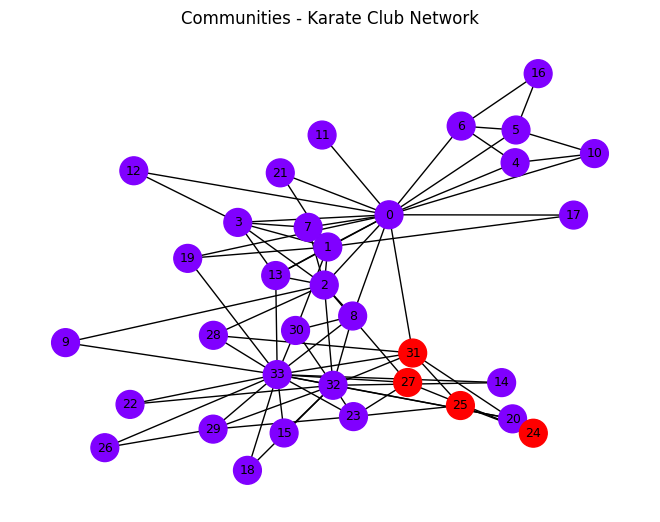

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict


def nx_to_adj_list(nx_graph):
    adj_lists = defaultdict(list)
    for u, v in nx_graph.edges():
        adj_lists[u].append(v)
        adj_lists[v].append(u)
    return adj_lists


karate_club_nx = nx.karate_club_graph()
G_adj_list = nx_to_adj_list(karate_club_nx)
communities = GN(G_adj_list)


color_map = {node: idx for idx, community in enumerate(communities) for node in community}
pos = nx.spring_layout(karate_club_nx)  # Positions for all nodes
colors = [color_map[node] for node in karate_club_nx.nodes()]
nx.draw(karate_club_nx, pos, node_color=colors, with_labels=True, cmap=plt.cm.rainbow, node_size=400, font_size=9)
plt.title("Communities - Karate Club Network")
plt.show()



# Task 4 (30 Marks)

## Use edge clustering co-efficient instead of edge betweeness

In the previous tasks we use the random walk edge betweeness centrality to find communities and the algorithm worked by deleting edges with low betweeness. In this case we will find clustering co-efficient of an edge and delete the edge with the lowest clustering co-efficient.

Steps to find the clustering co-efficient of an edge:

For each edge (u,v) do:

1. Find the neighboring nodes of node 'u' call it set *N(u)*.
2. Find the neighboring nodes of node 'v' call it set *N(v)*.
3. Take an intersection of sets *N(u)* and *N(v)* and call it *N(u,v)*.
4. Calculate the sum of the number of edges between the each pair of nodes in *N(u,v)*. This is the number of edges that exist between the common neighbors of u and v. Call this number as **n**.
5. The clustering coefficient of the edge (u,v) can be defined as: **n**/(|N(u,v)| ***C*** 2). In the equation |N(u,v)| represents the cardinality of the set *N(u,v)* and operator ***C*** denotes the combination operator (For example 5 ***C*** 2 is 10).

Find the clustering co-efficient of each edge using the above algorithm.
For this modify the **edge_betweeness** function as mentioned above to implement this logic and change the name of this new function to **edge_clustering_coeff**.

The modified Girvan-Newman algorithm can be divided into four main steps:

1. For every edge in a graph, calculate the edge clustering co-efficient.
2. Remove the edge with the lowest clustering co-efficient.
3. Calculate the clustering co-efficient for every remaining edge.
4. Repeat steps 2-4 until there are no more edges left.



### PLEASE NOTE: The input and output format of the 'edge_clustering_coeff' and 'rw_edge_betweeness' function should be the same.





Communities: [[0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 11], [4, 6, 5, 10, 16]]


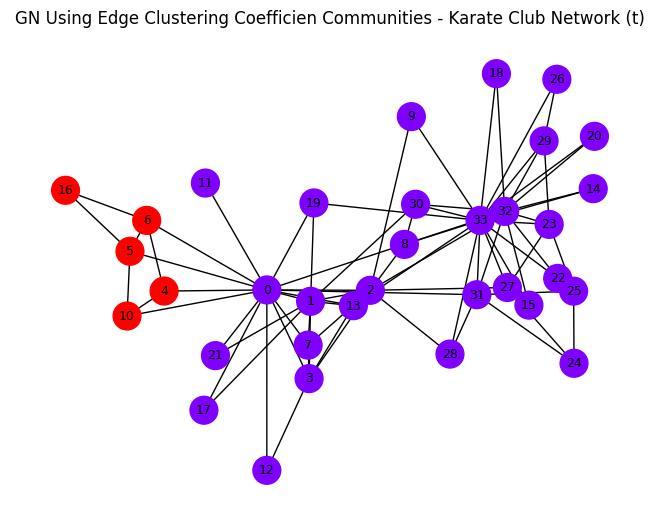

In [40]:
import networkx as nx
from collections import defaultdict
from itertools import combinations


def edge_clustering_coeff(G):
    edge_clustering = defaultdict(float)
    for u in G:
        for v in G[u]:
            if u < v:  # undirected graph
                N_u = set(G[u])
                N_v = set(G[v])
                N_uv = N_u.intersection(N_v)
                no_common_neib = 0
                if len(N_uv) >= 2:
                    for node1, node2 in combinations(N_uv, 2):
                        if node2 in G[node1]:
                            no_common_neib += 1
                if len(N_uv) < 2:
                  edge_clustering[(u, v)] = 0.0
                else:
                  denominator = (len(N_uv) * (len(N_uv) - 1)) / 2
                  edge_clustering[(u, v)] = no_common_neib / denominator
    return edge_clustering


Now find the communities by changing the **rw_edge_betweeness** function by the **edge_clustering_coeff** function.

In [46]:

# edge clustering coefficient
def GN_with_clustering(G):
    communities = []
    while True:
        edge_clustering = edge_clustering_coeff(G)
        if len(edge_clustering) == 0:
            break
        min_clustering_edge = min(edge_clustering, key=edge_clustering.get)
        node1, node2 = min_clustering_edge
        G[node1].remove(node2)
        G[node2].remove(node1)
        communities = find_communities(G)
        if len(communities) > 1:
            break
    return communities

karate_club_nx = nx.karate_club_graph()
G_adj_list = nx_to_adj_list(karate_club_nx)
communities = GN_with_clustering(G_adj_list)


print(f"Communities: {communities}")

Communities: [[0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 11], [4, 6, 5, 10, 16]]


Use the karate club network and find the communities using the modified algorithm (considering edge clustering co-efficient) that you just wrote. Then plot the network such that nodes in the same community have the same color. Also, use node labels in the plot.

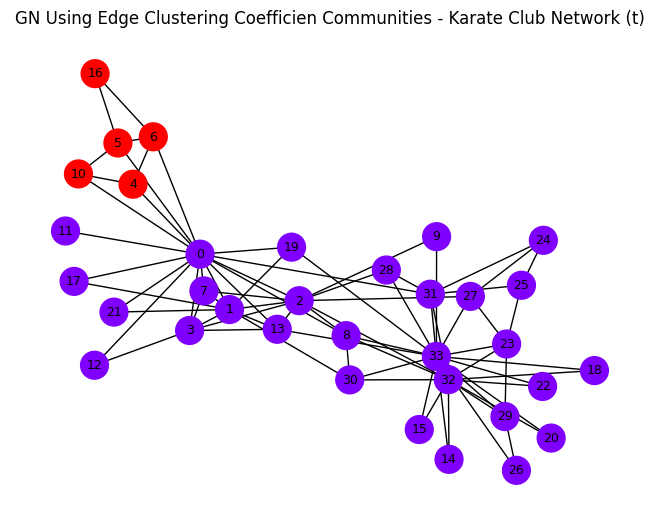

In [47]:
color_map = {node: idx for idx, community in enumerate(communities) for node in community}
pos = nx.spring_layout(karate_club_nx)  # Positions for all nodes
colors = [color_map[node] for node in karate_club_nx.nodes()]
nx.draw(karate_club_nx, pos, node_color=colors, with_labels=True, cmap=plt.cm.rainbow, node_size=400, font_size=9)
plt.title("GN Using Edge Clustering Coefficien Communities - Karate Club Network (t)")
plt.show()

# ----------- Thank You -----------